In [1]:
import numpy as np
import pandas as pd

In [4]:
# u.user 파일을 DataFrame으로 읽기 
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./u.user', sep='|', names=u_cols, encoding='latin-1')
users = users.set_index('user_id')
users.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [6]:
# u.item 파일을 DataFrame으로 읽기
i_cols = ['movie_id', 'title', 'release date', 'video release date', 'IMDB URL', 
          'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('./u.item', sep='|', names=i_cols, encoding='latin-1')
movies = movies.set_index('movie_id')
movies.head()


,title,release date,video release date,IMDB URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('./u.data', sep='\t', names=r_cols, encoding='latin-1') 
ratings = ratings.set_index('user_id')
ratings.head()

,movie_id,rating,timestamp
user_id,,,
196,242,3,881250949
186,302,3,891717742
22,377,1,878887116
244,51,2,880606923
166,346,1,886397596


# 개별 사용자에 대한 정보가 없는 경우
**&rightarrow; 가장 합리적인 방법은 best-seller를 추천하는 것이다**

In [13]:
def recom_movie1(n_items=5):
    movie_sort = movie_mean.sort_values(ascending=False)[:n_items]
    # movie의 평균 rating을 내림차순 정렬
    # n개의 item을 뽑은이후
    recom_movies = movies.loc[movie_sort.index]
    # 그것의 인덱스(movie_id)에 해당하는  movie정보 추출
    recommendations = recom_movies['title']
    # 그것의 title column 추출
    return recommendations

In [10]:
movie_mean = ratings.groupby(['movie_id'],)['rating'].mean() # groupby를 함으로써 원래의 인덱스는 드롭되는 것을 볼 수 있다.
movie_mean

movie_id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64

In [14]:
recom_movie1(5)

/tmp/ipykernel_461078/2522118804.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  movie_sort = movie_mean.sort_values(ascending=False)[:n_items]


movie_id
814                         Great Day in Harlem, A (1994)
1599                        Someone Else's America (1995)
1201           Marlene Dietrich: Shadow and Light (1996) 
1122                       They Made Me a Criminal (1939)
1653    Entertaining Angels: The Dorothy Day Story (1996)
Name: title, dtype: object

# 추천시스템의 정확도 추천
**&rightarrow;일반적인 딥러닝에서와 마찬가지로 RMSE등의 지표를 활용한다**

In [15]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

In [18]:
rmse = []
for user in set(ratings.index):
    # user_id의 중복을 제거하기 위해서 set을 사용한다.
    y_true = ratings.loc[user]['rating']
    #  user_id에 해당하는 ratings를 추출한다.
    y_pred = movie_mean[ratings.loc[user]['movie_id']]
    # 사용자가 평가한 movie_id의 평균평점을 예측으로 사용한다.
    accuracy = RMSE(y_true, y_pred)
    # RMSE 계산
    rmse.append(accuracy)
print(np.mean(rmse))
# 전체사용자의 평균을 보여준다.

0.996007224010567


# 2.4 사용자 집단별 추천
* 이전에는 전체 사용자의 평점평균을 사용하는 best-seller방법을 사용했다.
    * 그런데 여기서 성별,나이,직업등의 기준을 세워 소집단으로 만든이후 집단의 평점평균을 바탕으로 추천하는 것이면 더욱 좋은 추천을 할 수 있을것 이라는 생각이 든다.


In [3]:
import numpy as np
import pandas as pd

# 데이터 읽어 오기 
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./u.user', sep='|', names=u_cols, encoding='latin-1')
# 유저정보 추출 완료

i_cols = ['movie_id', 'title', 'release date', 'video release date', 'IMDB URL', 'unknown', 
          'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 
          'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
          'Thriller', 'War', 'Western']
movies = pd.read_csv('./u.item', sep='|', names=i_cols, encoding='latin-1')
# movie ID와 title 빼고 다른 데이터 제거
movies = movies[['movie_id', 'title']]
# 영화정보 추출완료

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('./u.data', sep='\t', names=r_cols, encoding='latin-1')
# timestamp 제거 
ratings = ratings.drop('timestamp', axis=1)
# 평점정보 추출완료

# train, test set 분리
from sklearn.model_selection import train_test_split
x = ratings.copy()
y = ratings['user_id']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y) 
# stratify=y로 user_id를 기준으로해서 train, test set을 쪼개게 된다.

In [4]:
# 정확도(RMSE)를 계산하는 함수
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

# 모델별 RMSE를 계산하는 함수 
# 이전에 모델을 정했다는 가정하에 작성
def score(model):
    id_pairs = zip(x_test['user_id'], x_test['movie_id'])
    y_pred = np.array([model(user, movie) for (user, movie) in id_pairs])
    # user와 movie를 바탕으로 영화평 예측값을 낸다.
    y_true = np.array(x_test['rating'])
    # 실제 true값
    return RMSE(y_true, y_pred)

# train 데이터로 Full matrix 구하기 
rating_matrix = x_train.pivot(index='user_id', columns='movie_id', values='rating')
# x_train의 pivot table구하기
# FullMatrix로써 평가하지 않은 사용자-영화 조합은 NaN으로 표시된다.

rating_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1669,1670,1672,1673,1675,1676,1678,1679,1680,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,NaN,3.0,3.0,5.0,NaN,1.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 전체 평균으로 예측치를 계산하는 기본 모델
def best_seller(user_id, movie_id):
    try:
        rating = train_mean.loc[movie_id]
        # train_mean의 movie_id를 조회한다.
    except:
        rating = 3.0
    # try~except문으로 나누는 이유는 train-test셋 분리를 하면서 가끔 train set에는 없는데 test set에는 존재하는 영화로 인해
    # 오류가 발생할 수 있기 때문이다.
    return rating

train_mean = x_train.groupby(['movie_id'])['rating'].mean()
# train set의 movie_id별로 점수의 평균을 낸다.
score(best_seller)

1.0220306464075892

**&rightarrow;위에 전체평균을 사용했을때 보다 결과가 나빠진것을 확인할 수 있는데, 그 이유는 현재는 train_set의 평균을 이용해서 test set에 대한 평균을 에측하는 것이기 때문에 그렇다.**

In [12]:
x_train

,user_id,movie_id,rating
87878,389,488,5
81248,99,789,4
35842,567,257,3
11015,224,282,4
83888,817,455,3
...,...,...,...
7865,355,310,4
89560,780,28,5
14008,216,153,4
80474,181,1366,1


## 사용자의 특성에따라 평점평균을 내보기[성별]
**이를 위해서 x_train[평점 데이터]와 사용자 데이터[u.user]를 합칠 필요가 있다.**<br>
**위의 과정을 위해 full matrix를 위에서 정의했는데, 이는 나중에 사용하는 것 같다.**

In [13]:
merged_ratings = pd.merge(x_train, users)
# default인 inner type merge로 공통key인 user_id를 기준으로 합친다.

users = users.set_index('user_id')
# user의 인덱스를 user_id로 정한다.
# gender별 평점평균 계산
g_mean = merged_ratings[['movie_id', 'sex', 'rating']].groupby(['movie_id', 'sex'])['rating'].mean()
# movie_id,sex,rating을 추출하고 이중에 movie_id와 sex를 이용해서 평균값을 추출한다.
g_mean

movie_id  sex
1         F      3.776596
          M      3.885714
2         F      3.428571
          M      3.206897
3         F      2.769231
                   ...   
1676      M      2.000000
1678      M      1.000000
1679      M      3.000000
1680      M      2.000000
1682      M      3.000000
Name: rating, Length: 3037, dtype: float64

In [52]:
'rating' in pd.DataFrame(g_mean)

True

In [49]:
'rating' in pd.DataFrame(g_mean)

True

In [36]:
(1,'F') in g_mean

True

* 어떤 DataFrame에 in을 사용하게 되면 그 인덱스와 column names 안에 있는지 확인하게 된다.

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1669, 1670, 1672, 1673, 1675, 1676, 1678, 1679, 1680, 1682],
           dtype='int64', name='movie_id', length=1641)

In [55]:
rating_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1669,1670,1672,1673,1675,1676,1678,1679,1680,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,NaN,3.0,3.0,5.0,NaN,1.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
g_mean[1]

sex
F    3.776596
M    3.885714
Name: rating, dtype: float64

In [59]:
g_mean[1]['F']

3.776595744680851

In [63]:
def cf_gender(user_id, movie_id):
    if movie_id in rating_matrix: # movie_id가 rating_matrix안에 있는지 파악
        gender = users.loc[user_id]['sex'] # user에서 user_id를 이용해서 성별을 뽑아옴
        if gender in g_mean[movie_id]: # g_mean은 두개가 인덱스로 갖는데 이중 하나만을 입력하면 나머지 하나를 기준으로 값이 출력이 된다
            gender_rating = g_mean[movie_id][gender] # g_mean[(movie_id,gender)] 이렇게 출력하는 것이 더 맞아보인다.
        else:
            gender_rating = 3.0
    else: # movie_id가 rating_matrix안에 없을경우
        gender_rating = 3.0
    return gender_rating

score(cf_gender)

1.0302472242549783

**&rightarrow; 사용자의 성별에 따른 추천이 개선을하지 못하는 것을 확인할 수 있다.**

# 내용 기반 필터링 추천(content-based  filtering:CB)

* Content-based filtering:CB는 아이템의 내용(ex.텍스트)를 분석해서 아이템간의 유사도를 계산하고 이를 바탕으로 추천을 한다. 아래와 같은 절차를 따른다.
    * 1. 각 아이템 간의 유사도(similarity)를 계산한다.
    * 2. 추천 대상이 되는 사용자가 선호하는 아이템을 선정한다.
    * 3. 위 2에서 선정된 아이템과 가장 유사도가 높은 N개의 아이템을 찾느다.
    * 4. 선호하는 아이템과 유사도가 높은 아이템들 중에서 기준을 세워 선택해 사용자에게 추천한다.

* 이것에는 몇가지 이슈가 있다.
    * **1. 아이템 간의 유사도를 어떻게 계산할 것인가?**
        * ex> 텍스트를 분석하는 경우에는 tf-idf(term frequency-inverse document frequency)가 대표적이다.<br>
            &rightarrow; 어떤 '단어'가 해당 문서에 얼마나 자주등장하는가(tf) 또 다른 문서에 비해서 얼마나 상대적으로 자주 등장하는가(idf)를 계산해서 각 문서에 단어들에 대해서 가중치를 매기고 이 가중치가 얼마나 비슷한지(similarity)를 문서(아이템)간에 비교를 수행한다.
    * **2. 사용자에게 몇개의 아이템을 좋다고 선택하게 할 것인가**
        * 하나만 선택하는 것이 간편할테지만 여러개를 선택하게 해야 사용자의 취향을 구체화할 수 있다.
    * **3. 만일 다수의 아이템을 선택하게 한다면 또 그것에 파생돼서 유사도가 높은 아이템을 추천하도록 할테인데 이 많은 경우중 어떠한 것을 추천할 것인가?**
        * Pooling이나 가장 좋은 점수에 따라서 나열하는 방법등이 있을 것이다.

In [66]:
import pandas as pd

# Data 읽기
movies = pd.read_csv('./movies_metadata.csv', encoding='latin-1', low_memory=False)
movies = movies[['id', 'title', 'overview']]
len(movies)

45442

In [65]:
movies.head(10)

,id,title,overview
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...
5,949,Heat,"Obsessive master thief, Neil McCauley leads a ..."
6,45325,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses..."
7,9091,Sudden Death,International action superstar Jean Claude Van...
8,710,GoldenEye,James Bond must unmask the mysterious head of ...
9,9087,The American President,"Widowed U.S. president Andrew Shepherd, one of..."


In [68]:
movies.duplicated().sum() # 중복되는 것들의 갯수 체크

30

In [69]:
# 데이터 전처리
movies = movies.drop_duplicates()
movies = movies.dropna()
movies['overview'] = movies['overview'].fillna('')
len(movies)

44300

##  What is TfidVectorizer
CountVectorizer를 통해 자연어를 벡터화하는 경우 발생할 수 있는 문제점(의미 없이 자주 사용되는 단어의 가중치의 증가 등)을 해결하기 위한 방법 중 하나가 TfidfVectorizer다.

TfidfVectorizer
Tf, idf 두 가지를 먼저 이해해야 한다.

**1) Tf(Term Frequency)**

하나의 문서(문장)에서 특정 단어가 등장하는 횟수

**2) Idf(Inverse Document Frequency)**

Df(Document Frequency)는 문서 빈도. 특정 단어가 몇 개의 문서(문장)에서 등장하는지를 수치화 한 것. 그것의 역수가 idf다. 보통 그냥 역수를 취하기 보다는 아래처럼 수식화한다. 역수 개념을 사용하는 이유는, 적은 문서(문장)에 등장할수록 큰 숫자가 되게하고 반대로 많은 문서(문장)에 등장할수록 숫자를 작아지게 함으로써 여러 문서(문장)에 의미 없이 사용되는 단어의 가중치를 줄이기 위해서다.
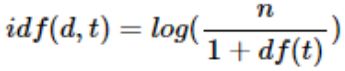
 Tf-idf 수치는 Tf 값과 Idf 값을 곱하여 구한다. 해당 연산을 거친 최종 Tf-idf 값은 0과 1사이로 만들어진다.
 Tf-idf수치를 이용해서 자연어를 벡터화 한다.

In [70]:
# 불용어를 english로 지정하고 tf-idf 계산
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english') # 불용어를 령어로 지정해서 vector화하는 객체를 만들고
tfidf_matrix = tfidf.fit_transform(movies['overview'])

**cosine_similarity**
코사인 유사도란 벡터와 벡터 간의 유사도를 비교할 때 두 벡터 간의 사잇각을 구해서 얼마나 유사한지 수치로 나타낸 것입니다. 벡터 방향이 비슷할수록 두 벡터는 서로 유사하며, 벡터 방향이 90도 일때는 두 벡터 간의 관련성이 없으며, 벡터 방향이 반대가 될수록 두 벡터는 반대 관계를 보입니다. 
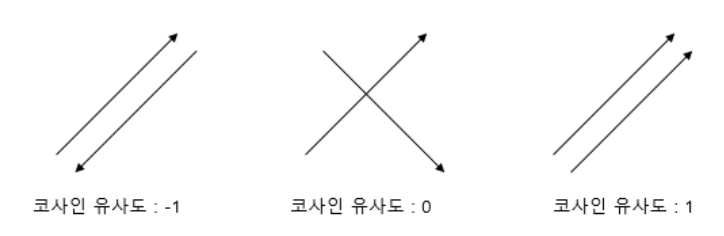
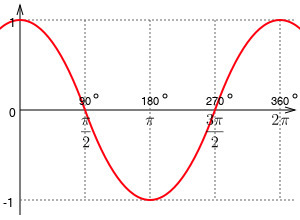

In [76]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix) # 줄거리 텍스트에 대해서 tf-idf를 계산해서 유사도를 체크한다.
cosine_sim

array([[1.        , 0.01498114, 0.        , ..., 0.        , 0.0059551 ,
        0.        ],
       [0.01498114, 1.        , 0.04696776, ..., 0.        , 0.02201769,
        0.00935609],
       [0.        , 0.04696776, 1.        , ..., 0.        , 0.01407684,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.0059551 , 0.02201769, 0.01407684, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.00935609, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [79]:
cosine_sim = pd.DataFrame(cosine_sim, index = movies.index, columns = movies.index)

In [80]:
# index-title을 뒤집는다.
indices = pd.Series(movies.index, index = movies['title'])
indices

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Subdue                         45437
Century of Birthing            45438
Betrayal                       45439
Satan Triumphant               45440
Queerama                       45441
Length: 44300, dtype: int64

In [81]:
# 영화제목을 받아서 추천 영화를 돌려주는 함수
def content_recommender(title,n_of_recomm): # 영화 하나의 제목을 받아서 지정된 개수만큼 돌려주는 함수이다.
    #title에서 영화 index 받아오기
    idx = indices[title]
    # 주어진 영화와 다른 영화의 similarity를 가져온다.
    sim_scores = cosine_sim[idx]
    # similarity기준으로 정렬하고 n_of_recomm만큼 가져오기
    sim_scores = sim_scores.sort_values(ascending = False).iloc[1:n_of_recomm+1]
    return movies.loc[sim_scores.index,'title']
print(content_recommender('The Lion King',5))
print(content_recommender('The Dark Knight Rises',10))

34664    How the Lion Cub and the Turtle Sang a Song
9339                               The Lion King 1Â½
9101                  The Lion King 2: Simba's Pride
42806                                           Prey
25637                                 Fearless Fagan
Name: title, dtype: object
12468                                      The Dark Knight
149                                         Batman Forever
1321                                        Batman Returns
15497                           Batman: Under the Red Hood
584                                                 Batman
21179    Batman Unmasked: The Psychology of the Dark Kn...
9216                    Batman Beyond: Return of the Joker
18021                                     Batman: Year One
19778              Batman: The Dark Knight Returns, Part 1
3085                          Batman: Mask of the Phantasm
Name: title, dtype: object
